In [96]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import prince

In [97]:
cuadro = pd.read_csv('cuadro.csv')
tabla = pd.read_csv('cleaned.csv')
ar = pd.read_csv('ar.csv')
eo = pd.read_csv('eo.csv')
cuadro.set_index('index', inplace=True)
tabla.set_index('index', inplace=True)
ar.set_index('index', inplace=True)
eo.set_index('index', inplace=True)

In [98]:
eo

,author,year,critiria,min_age,max_age,men,women,proportional,gender,country_1,country_2
index,,,,,,,,,,,
1,alder,2022,crr,2,8,24,8,no,no,usa,usa
3,arnell,2022,crr,12,16,8,4,no,no,suecia,suecia
4,arnell,2020,c+isr+crr,6,12,16,12,no,no,suecia,suecia
5,arnell,2018,crr,12,16,17,7,no,si,suecia,suecia
6,bassette,2018,crr,18,21,1,2,no,no,usa,usa
...,...,...,...,...,...,...,...,...,...,...,...
76,waldron,2022,crr,18,78,3451,919,no,si,usa,usa
78,woodman,2018,crr,5,13,11,2,no,no,usa,usa
79,ye,2019,crr,11,14,20,4,no,no,china,china


In [99]:
eo = eo.astype({'year': int, 'min_age': int,
                'max_age': int, 'men': int, 'women': int,
                'proportional':str, 'gender':str,
                'author':str, 'country_1':str, 'country_2':str, 'critiria':str})

In [100]:
famd = prince.FAMD(n_components=24, n_iter=40, copy=True, engine='auto', random_state=42)
famd = famd.fit(eo)


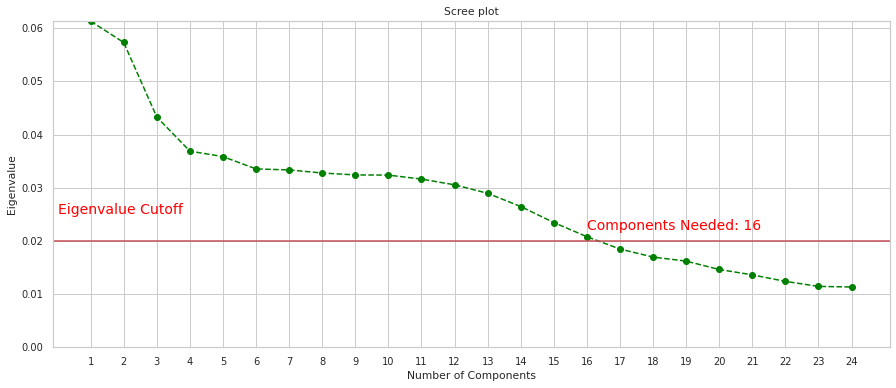

In [101]:

plt.figure(figsize=(15, 6))
components = np.arange(1, 25, step=1)
eigenvalues = famd.explained_inertia_
plt.plot(components, eigenvalues, marker = 'o', 
                 linestyle = '--', color = 'green')
plt.ylim(0, max(eigenvalues))
plt.ylabel('Eigenvalue')
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 25, step = 1))
plt.title('Scree plot')
plt.axhline(y=0.02, color = 'r', linestyle = '-')
plt.text(0, 0.025, 'Eigenvalue Cutoff', color = 'red', fontsize=14)
plt.text(16, 0.022, 'Components Needed: '+str(np.where(eigenvalues<=0.02)[0][0]), 
                 color = 'red', fontsize=14)
plt.show()


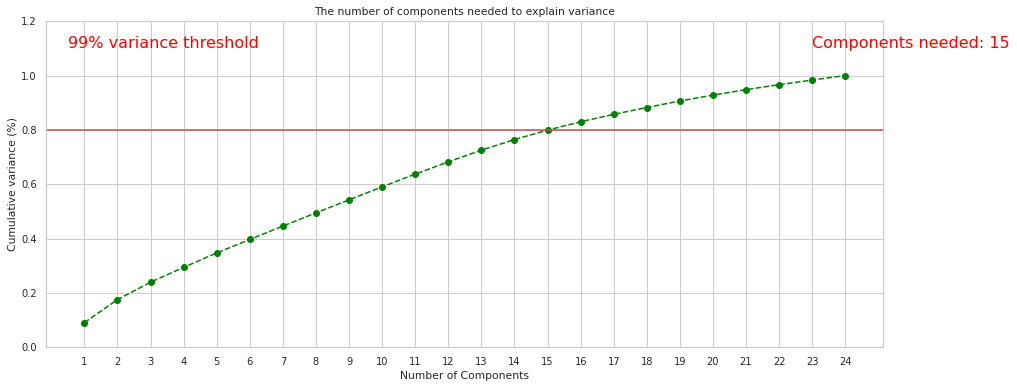

In [102]:
plt.figure(figsize = (15, 6))
components = np.arange(1, 25, step=1)
explained_variance_ratio_ = famd.explained_inertia_ / np.sum(famd.explained_inertia_)
variance = np.cumsum(explained_variance_ratio_)
plt.ylim(0.0,1.2)
plt.plot(components, variance, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 25, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(0.8, color='r', linestyle='-')
plt.text(0.5, 1.1, '99% variance threshold', color = 'red', fontsize=16)
plt.text(23, 1.1, "Components needed: "+str(np.where(np.cumsum(explained_variance_ratio_)>=0.8)[0][0]), color = "red", fontsize=16)

plt.show()

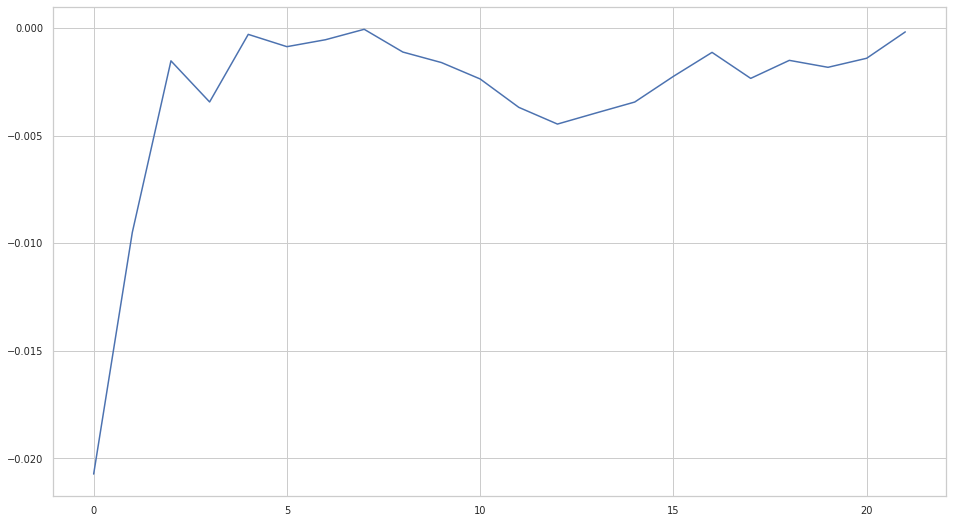

In [103]:
plt.plot(np.diff(np.diff(np.cumsum(explained_variance_ratio_))))

In [104]:
a = np.abs(np.diff(np.diff(np.diff(np.cumsum(explained_variance_ratio_)))))
np.round(100*a/a.max())

array([100.,  71.,  17.,  28.,   5.,   3.,   4.,   9.,   4.,   7.,  12.,
         7.,   5.,   5.,  11.,  10.,  11.,   7.,   3.,   4.,  11.])

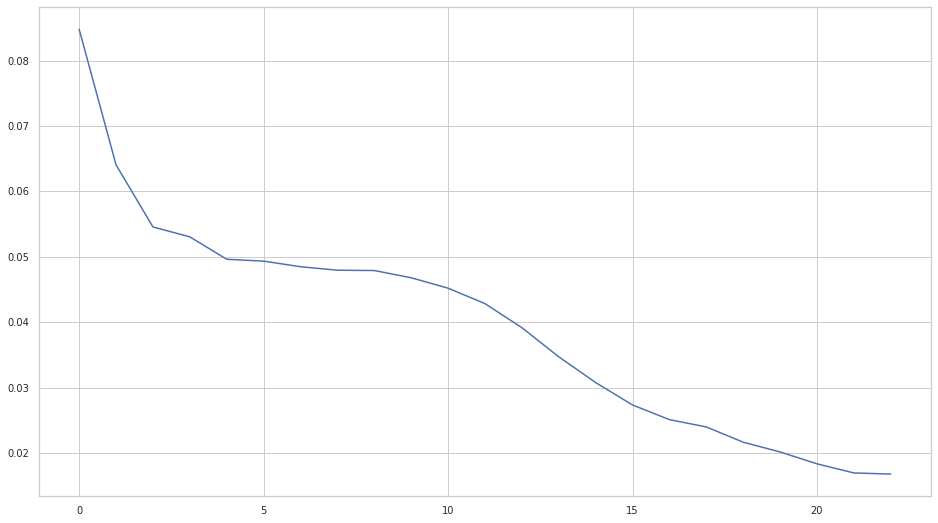

In [105]:
plt.plot(np.diff(np.cumsum(explained_variance_ratio_)))

In [106]:
famd = prince.FAMD(n_components=16, n_iter=40, copy=True, engine='auto', random_state=42)
famd = famd.fit(eo)

In [107]:
famd.eigenvalues_

array([0.01932135, 0.01805797, 0.01364263, 0.01162038, 0.01129753,
       0.01056757, 0.01050715, 0.01032482, 0.01021136, 0.01020108,
       0.00996549, 0.00962562, 0.0091234 , 0.00834007, 0.00739112,
       0.00655219])

In [108]:
famd.total_inertia_

0.3150022479873721

In [109]:
famd.explained_inertia_

array([0.06133717, 0.05732647, 0.04330961, 0.03688983, 0.03586491,
       0.0335476 , 0.03335578, 0.03277698, 0.03241677, 0.03238415,
       0.03163625, 0.03055729, 0.02896298, 0.02647621, 0.02346371,
       0.02080045])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


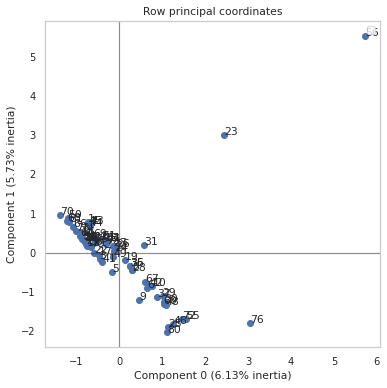

In [110]:
ax = famd.plot_row_coordinates(eo, ax=None, figsize=(6, 6), x_component=0,
                               y_component=1, labels=eo.index,
                               ellipse_outline=False,
                               ellipse_fill=True,
                               show_points=True)
ax.get_figure().savefig('prueba.svg')


In [111]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D

In [112]:
eo.columns.tolist()

['author',
 'year',
 'critiria',
 'min_age',
 'max_age',
 'men',
 'women',
 'proportional',
 'gender',
 'country_1',
 'country_2']

/home/nicofredes/miniconda3/envs/main/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


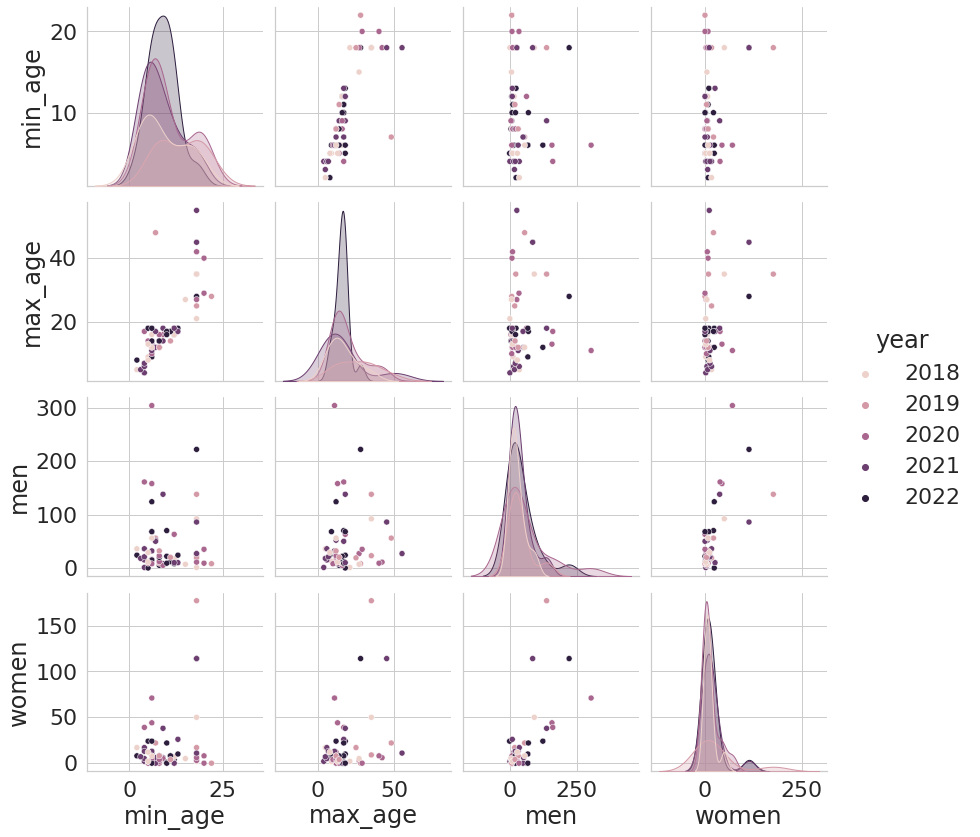

In [113]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_palette(palette="Set1")
sns.pairplot(eo[eo.men < 1000], hue='year',size=3,vars=['min_age', 'max_age', 'men', 'women'], kind='scatter')
plt.savefig("todos_con_todos_men<1000.png") 

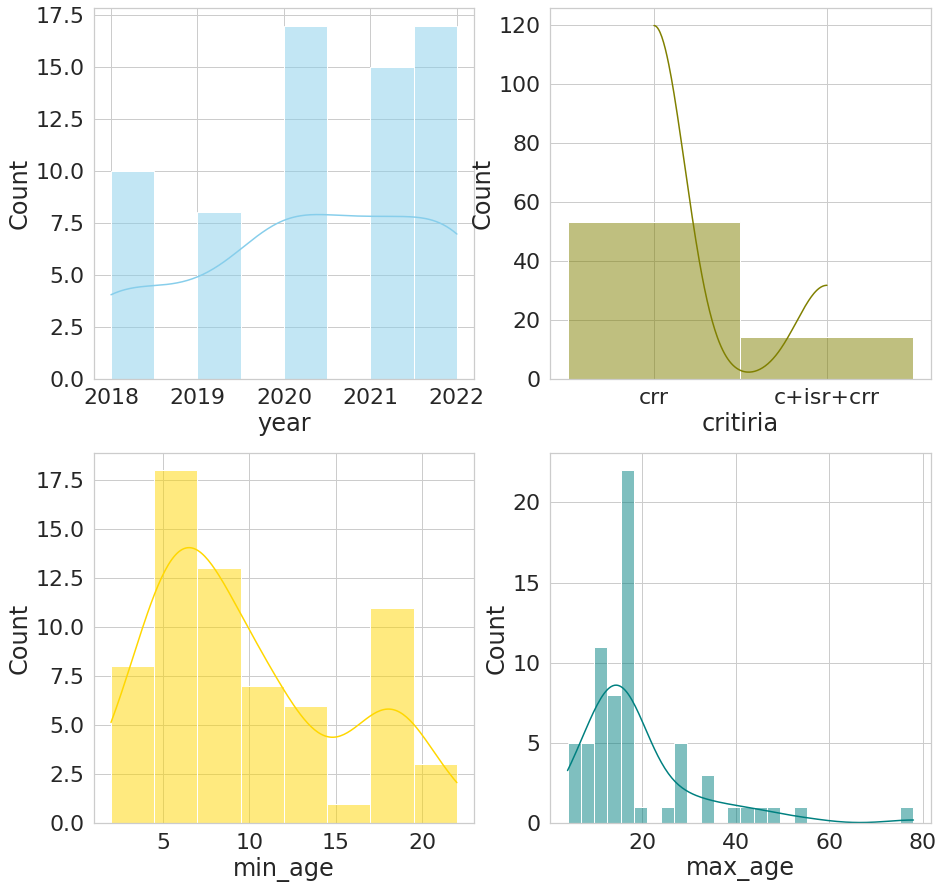

In [114]:
#sns.set(style="darkgrid")
#sns.set(font_scale=2)
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.histplot(data=eo, x='year', kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=eo, x='critiria', kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=eo, x='min_age', kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=eo, x='max_age', kde=True, color="teal", ax=axs[1, 1])

plt.savefig("hist_numerical.png") 

In [115]:
eo

,author,year,critiria,min_age,max_age,men,women,proportional,gender,country_1,country_2
index,,,,,,,,,,,
1,alder,2022,crr,2,8,24,8,no,no,usa,usa
3,arnell,2022,crr,12,16,8,4,no,no,suecia,suecia
4,arnell,2020,c+isr+crr,6,12,16,12,no,no,suecia,suecia
5,arnell,2018,crr,12,16,17,7,no,si,suecia,suecia
6,bassette,2018,crr,18,21,1,2,no,no,usa,usa
...,...,...,...,...,...,...,...,...,...,...,...
76,waldron,2022,crr,18,78,3451,919,no,si,usa,usa
78,woodman,2018,crr,5,13,11,2,no,no,usa,usa
79,ye,2019,crr,11,14,20,4,no,no,china,china


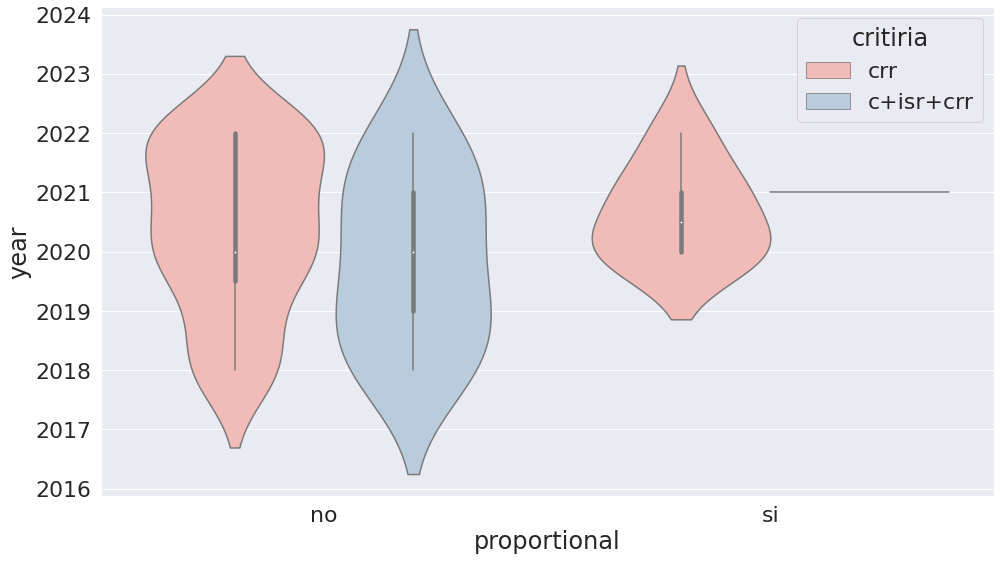

In [116]:
#sns.set(style="darkgrid")
# Grouped violinplot
sns.set(font_scale=2)
sns.violinplot(x="proportional", y="year", hue="critiria", data=eo, palette="Pastel1")
plt.savefig("violin_year_prop.png") 

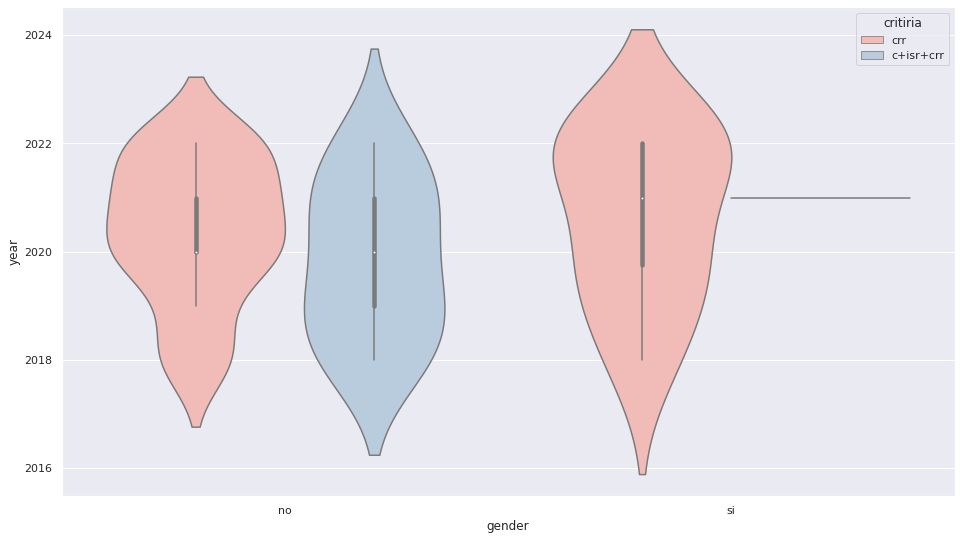

In [117]:
sns.set(style="darkgrid")
#sns.set(font_scale=2)
# Grouped violinplot
sns.violinplot(x="gender", y="year", hue="critiria", data=eo, palette="Pastel1")
plt.savefig("violin_year_gender.png") 

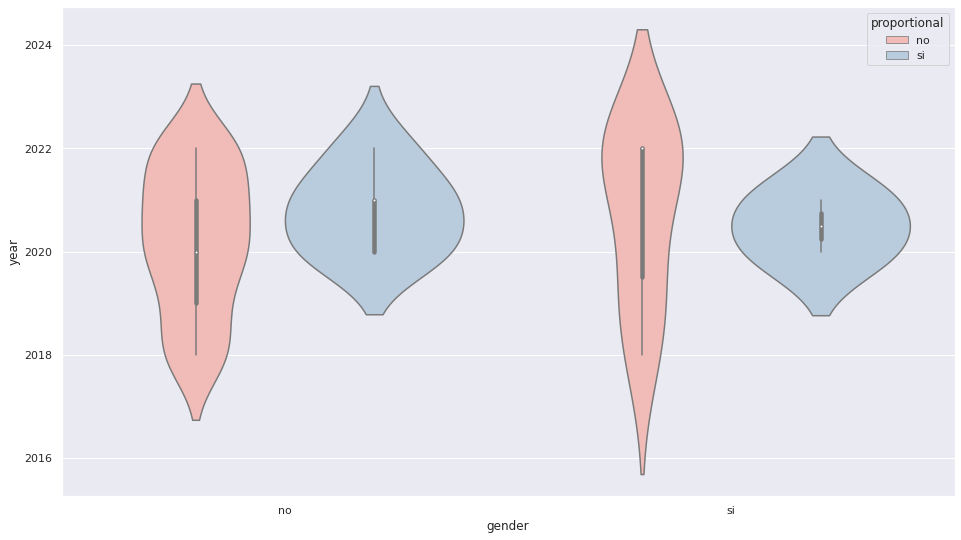

In [118]:
sns.set(style="darkgrid")
#sns.set(font_scale=2)
# Grouped violinplot
sns.violinplot(x="gender", y="year", hue="proportional", data=eo, palette="Pastel1")
plt.savefig("violin_year_gender_prop.png") 

In [119]:
countries = tabla.country.str.split(' ', n = 1, expand = True)

In [120]:
data = eo[eo.country_1!=eo.country_2].copy()
data.loc[:, 'country_1'] = data.country_2
data

,author,year,critiria,min_age,max_age,men,women,proportional,gender,country_1,country_2
index,,,,,,,,,,,
12,bo,2019,c+isr+crr,8,12,9,0,no,no,usa,usa
16,carey,2022,crr,5,18,0,24,no,no,uk,uk
46,kim,2020,crr,18,42,11,6,no,no,usa,usa
49,lee,2022,crr,10,17,70,22,no,no,usa,usa
58,moraes,2022,crr,10,16,22,0,no,no,uk,uk
69,sung,2022,crr,6,18,68,0,no,no,taiwan,taiwan
75,tse,2019,crr,8,12,32,8,no,no,usa,usa


In [121]:
data = pd.concat([eo, data], sort=False)[['year', 'country_1']]

In [122]:
data.reset_index(inplace=True, drop=True)

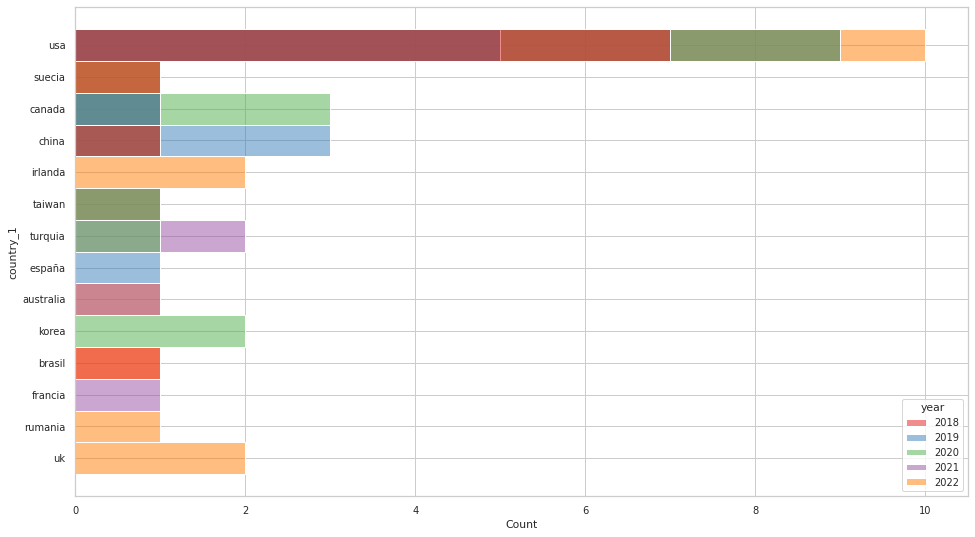

In [123]:
sns.set(font_scale=0.9)
sns.set_style("whitegrid")
sns.histplot(data, y="country_1", hue="year", element="bars", palette="Set1")
plt.savefig("hist_country_year.png") 

In [124]:
data.head()

,year,country_1
0,2022,usa
1,2022,suecia
2,2020,suecia
3,2018,suecia
4,2018,usa


In [125]:
sns.set(font_scale=1)
sns.set_style("whitegrid")
#sns.histplot(eo[eo.men < 1000], x="men", hue="cluster", element="step")
sns.displot(data, y="country", hue="year", element="bars", palette='Set1', kind="kde")


ValueError: Could not interpret value `country` for parameter `y`

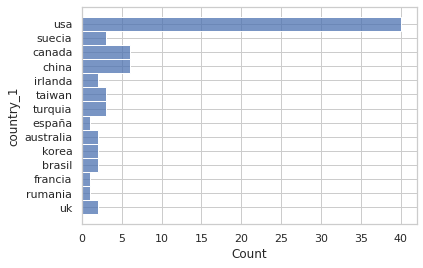

In [ ]:
sns.histplot(y=data.country_1)
plt.savefig("hist_country.png") 

In [ ]:
famd.row_coordinates(eo)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
index,,,,,,,,,,,,,,,,
1,-0.729527,0.778588,-0.737786,0.021446,-0.610229,0.015103,-0.622834,-0.320833,-0.182371,-0.099958,0.106770,-0.132494,-0.101279,0.723485,-0.392330,-0.533329
3,-0.462375,-0.150916,-0.082130,0.681198,0.129418,2.571124,2.175651,-1.492351,-0.345311,0.274020,0.293588,-0.073155,-0.341290,-0.118185,0.069189,0.201543
4,-0.812324,0.284653,0.943895,0.822145,-0.031163,2.503609,2.143251,-1.421575,-0.338632,0.253563,0.246786,-0.137193,-0.134498,-0.131449,0.071406,-0.053370
5,-0.178775,-0.491805,1.037898,1.263748,0.016373,2.504007,2.052181,-1.767847,-0.389669,0.255169,0.194157,-0.095866,0.221187,0.033057,0.218859,0.368389
6,0.642035,-0.890633,0.917602,-0.506092,0.122707,0.004261,-0.437407,-0.278421,-0.045055,0.011928,-0.119519,0.015692,0.799455,0.050526,1.118651,0.115924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,3.036577,-1.788982,-1.159093,0.470699,-0.274471,0.189512,0.093827,0.341536,0.061813,0.004351,0.159755,-0.272886,-0.948848,-1.339898,-0.653256,-1.115051
78,-0.311044,0.234498,0.894120,0.070630,-0.200895,-0.185775,-0.723352,-0.457270,-0.154943,-0.046875,-0.078661,-0.015560,0.919966,0.739555,0.798668,-0.034552
79,-0.674019,0.135242,1.614842,-0.215212,0.329614,0.099326,-0.226049,0.817709,0.203243,-0.084213,-1.089628,0.197730,-1.418478,-0.241536,0.267606,1.114628


In [ ]:
famd = prince.FAMD(n_components=8, n_iter=40, copy=True, engine='auto', random_state=42)
famd = famd.fit(eo)

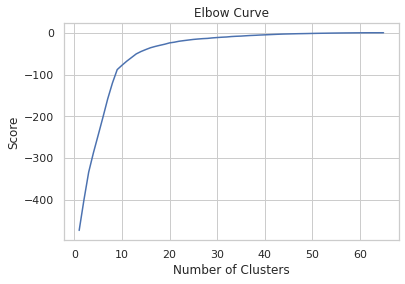

In [ ]:
Nc = range(1, 66)
kmeans = [KMeans(n_clusters=i, n_init=100) for i in Nc]
kmeans
score = [kmeans[i].fit(famd.row_coordinates(eo)).score(famd.row_coordinates(eo)) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

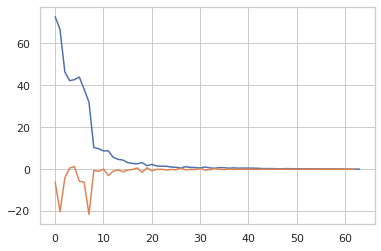

In [ ]:
plt.plot(np.diff(score))
plt.plot(np.diff(np.diff(score)))

In [ ]:
np.abs(np.diff(np.diff(np.diff(score))))

array([1.41132315e+01, 1.59965197e+01, 4.72930826e+00, 6.85754787e-01,
       6.99987292e+00, 4.03405627e-01, 1.53846985e+01, 2.09670460e+01,
       4.18504623e-01, 1.08428379e+00, 3.12129685e+00, 2.08610425e+00,
       6.47339197e-01, 8.70384507e-01, 7.93642381e-01, 2.53805769e-01,
       7.24931919e-01, 2.05589699e+00, 2.12082766e+00, 1.38317225e+00,
       6.72874282e-01, 4.14140379e-02, 3.41816157e-01, 2.41547375e-01,
       1.36590637e-01, 8.50992065e-01, 8.90680669e-01, 2.24680500e-01,
       8.88562752e-02, 6.26794353e-01, 8.39425353e-01, 1.80003428e-01,
       5.53902220e-01, 4.09904195e-01, 1.59988174e-01, 3.78692297e-01,
       2.98882104e-01, 1.96765309e-01, 4.04618271e-02, 4.65054539e-02,
       1.85626394e-02, 8.87372065e-02, 1.54547202e-01, 1.91276583e-02,
       6.70892615e-02, 8.95651418e-02, 5.62822492e-02, 1.21974239e-01,
       3.35947589e-02, 4.92357909e-03, 4.89881573e-02, 6.17831054e-02,
       2.92919090e-02, 1.21897254e-02, 1.55978111e-02, 3.12208161e-03,
      

In [ ]:
famd = prince.FAMD(n_components=8, n_iter=40, copy=True, engine='auto', random_state=42)
famd = famd.fit(eo)

In [ ]:
X=famd.row_coordinates(eo)

In [ ]:
kmeans = KMeans(n_clusters=9).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[-2.66798885e-01  2.17595543e-01 -2.38592963e-01 -1.95109347e-02
  -4.96516869e-01 -1.26411360e-02 -5.33667835e-01 -3.59792951e-01]
 [ 1.15307957e+00 -1.31829973e+00  2.14939610e-01 -5.55186685e-01
   5.65495217e-02  1.17954962e-01 -6.60130778e-02  1.57297931e-01]
 [-9.16150413e-01  4.43351554e-01 -1.54274527e+00  1.61659058e-01
   3.62669663e-01  6.83799100e-01  6.16340891e-03  1.35455088e+00]
 [-4.84491306e-01 -1.19355798e-01  6.33221114e-01  9.22363704e-01
   3.82091908e-02  2.52624663e+00  2.12369471e+00 -1.56059140e+00]
 [ 4.08536281e+00  4.26570038e+00  1.28908030e-01  8.32966521e-02
   4.15118393e-01  1.03754332e-03  3.94106754e-01  1.89424811e-01]
 [-5.38042338e-01 -4.65255220e-02 -2.91099981e-01  2.23053255e-01
   2.06241996e+00 -9.64876300e-01  8.73101039e-03 -9.11291036e-01]
 [-8.18589327e-01  2.93838557e-01 -2.63956763e-01 -6.93512426e-01
  -1.19227355e+00 -2.17453409e+00  2.68758293e+00  8.28380382e-02]
 [ 1.12680906e+00 -1.89822588e+00  4.58277026e-01  6.11530545e+00
  -

/home/nicofredes/miniconda3/envs/main/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
eo['cluster'] = kmeans.predict(X)


In [ ]:
eo = pd.read_csv('EO_cluster_final.csv')

In [ ]:
eo.head(50)

,index,author,year,critiria,min_age,max_age,men,women,proportional,gender,country_1,country_2,cluster
0,1,alder,2022,crr,2,8,24,8,no,no,usa,usa,1
1,3,arnell,2022,crr,12,16,8,4,no,no,suecia,suecia,6
2,4,arnell,2020,c+isr+crr,6,12,16,12,no,no,suecia,suecia,6
3,5,arnell,2018,crr,12,16,17,7,no,si,suecia,suecia,6
4,6,bassette,2018,crr,18,21,1,2,no,no,usa,usa,3
5,7,becerra,2021,crr,4,4,1,2,no,no,usa,usa,1
6,8,bennett,2022,crr,13,18,24,10,si,no,usa,usa,1
7,9,benson,2019,crr,18,35,23,9,no,no,canada,canada,7
8,10,bishop,2022,crr,18,28,222,114,no,no,usa,usa,3
9,11,blagrave,2022,c+isr+crr,8,14,5,3,no,no,usa,usa,1


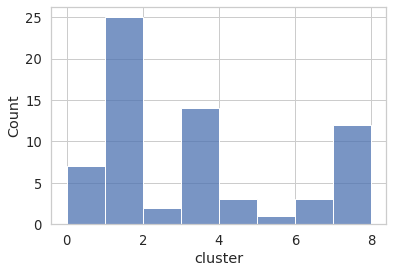

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.histplot(x=eo.cluster, bins=8)
plt.savefig("hist_cluster.png") 

In [ ]:
eo.index

RangeIndex(start=0, stop=67, step=1)

In [ ]:
colors = sns.color_palette('Set1', n_colors=9)
palette = {mode: color for mode, color in zip(eo.cluster.unique(), colors)}

/home/nicofredes/miniconda3/envs/main/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


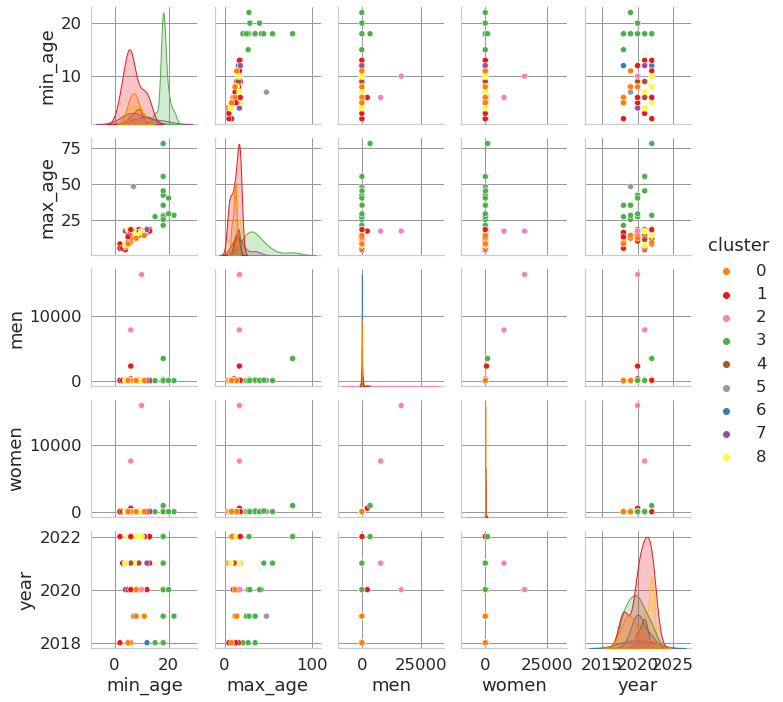

In [ ]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {"grid.color": "0.6", "grid.linestyle": "-"})
sns.pairplot(eo, hue='cluster',size=2,vars=['min_age', 'max_age', 'men', 'women', 'year'], kind='scatter', palette=palette)
plt.savefig("info_por_cluster.png") 

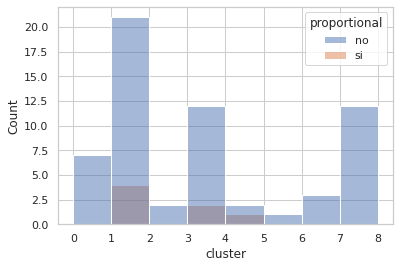

In [ ]:
sns.set(font_scale=1)
sns.set_style("whitegrid")
sns.histplot(eo, x="cluster", hue="proportional", element="bars")
plt.savefig("proportional_x_cluster.png") 

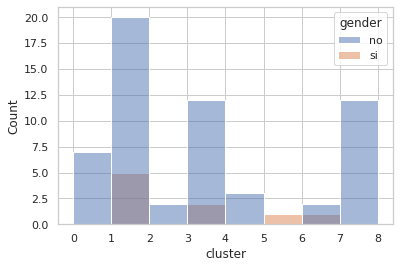

In [ ]:
sns.histplot(eo, x="cluster", hue="gender", element="bars")
plt.savefig("gender_x_cluster.png") 

/home/nicofredes/miniconda3/envs/main/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


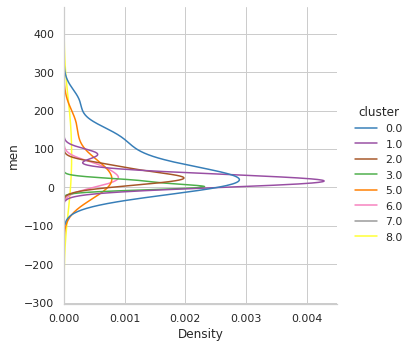

In [ ]:
sns.set(font_scale=1)
sns.set_style("whitegrid")
#sns.histplot(eo[eo.men < 1000], x="men", hue="cluster", element="step")
sns.displot(data=eo[eo.men < 1000], x="men", hue="cluster", kind="kde", palette=palette)
plt.savefig("men_en_clusters.png") 

/home/nicofredes/miniconda3/envs/main/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


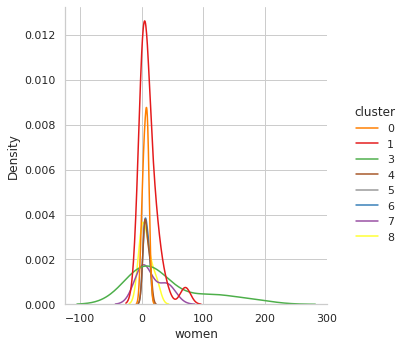

In [ ]:
sns.set(font_scale=1)
sns.set_style("whitegrid")
#sns.histplot(eo[eo.men < 1000], x="men", hue="cluster", element="step")
sns.displot(data=eo[eo.men < 1000], x="women", hue="cluster", kind="kde", palette=palette)
plt.savefig("women_en_clusters.png") 

/home/nicofredes/miniconda3/envs/main/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


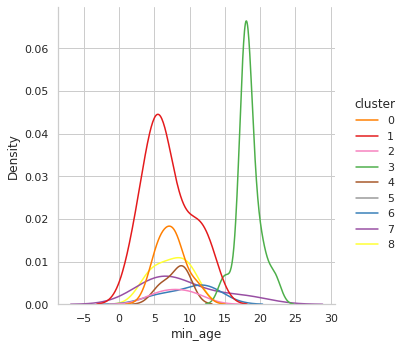

In [ ]:
sns.set(font_scale=1)
sns.set_style("whitegrid")
#sns.histplot(eo[eo.men < 1000], x="men", hue="cluster", element="step")
sns.displot(data=eo, x="min_age", hue="cluster", kind="kde", palette=palette)
plt.savefig("minage_en_clusters.png") 

/home/nicofredes/miniconda3/envs/main/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/nicofredes/miniconda3/envs/main/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


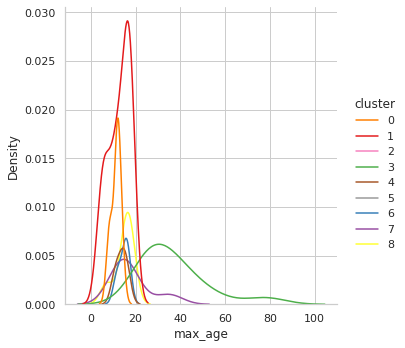

In [ ]:
sns.set(font_scale=1)
sns.set_style("whitegrid")
#sns.histplot(eo[eo.men < 1000], x="men", hue="cluster", element="step")
sns.displot(data=eo, x="max_age", hue="cluster", kind="kde", palette=palette)
plt.savefig("maxage_en_clusters.png") 

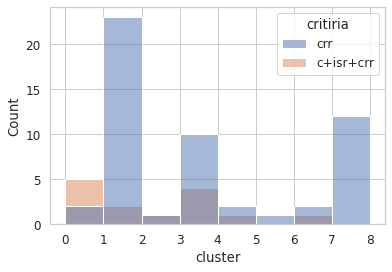

In [ ]:
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
sns.histplot(eo, x="cluster", hue="critiria", element="bars")
plt.savefig("critiria_x_cluster.png") 

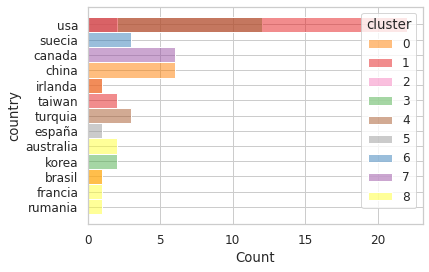

In [ ]:
colors = sns.color_palette('Set1', n_colors=9)
palette = {mode: color for mode, color in zip(eo.cluster.unique(), colors)}
sns.histplot(eo.rename(columns={'country_1':'country'}), y="country", hue="cluster", palette=palette)
#sns.set(font_scale=2)
plt.savefig("country_x_cluster.png") 

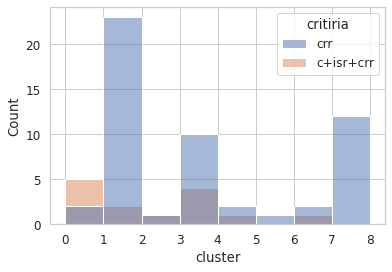

In [ ]:
sns.histplot(eo, x="cluster", hue="critiria", element="bars")
plt.savefig("critiria_x_cluster.png") 

<AxesSubplot: xlabel='Count', ylabel='country_1'>

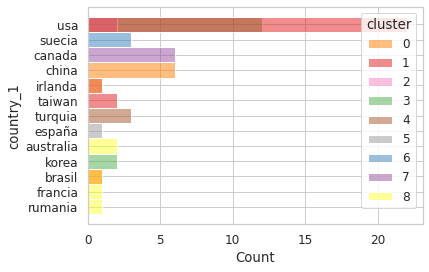

In [ ]:
sns.histplot(eo, y="country_1", hue="cluster", element="bars", palette=palette)
#sns.set(font_scale=2)

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

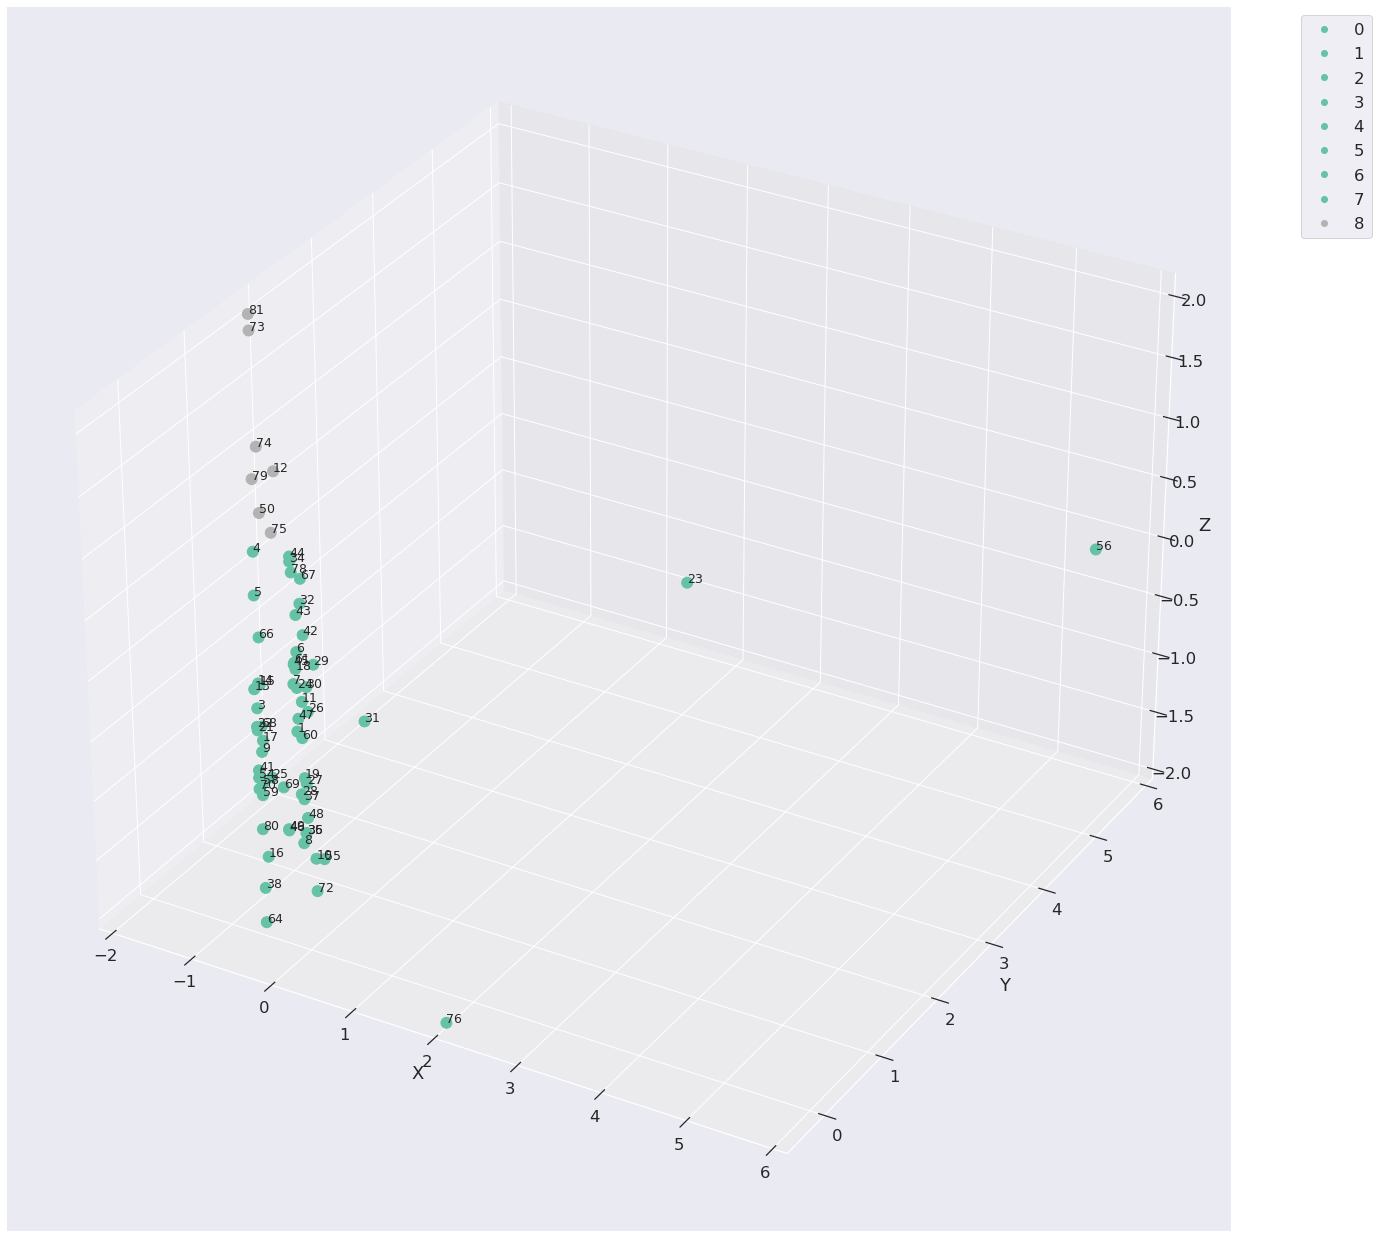

In [ ]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
sns.set(font_scale=1.5)
labels = kmeans.predict(X)
# generate data
x = X[0].to_numpy()
y = X[1].to_numpy()
z = X[2].to_numpy()
zdirs = (None, 'x', 'y', 'z', (1, 1, 0), (1, 1, 1))

# axes instance
fig = plt.figure(figsize=(17,17))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("Set2", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=120, c=labels, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

for i, index in enumerate(X.index.tolist()):
    ax.text(x[i], y[i], z[i], str(index), size='x-small')
ax.set_xlim(-2, 6)
ax.set_ylim(-0.5, 6)
ax.set_zlim(-2, 2.1)
# save
plt.savefig("scatter_all", bbox_inches='tight')


In [ ]:
eo['cluster'] = labels
eo.cluster.astype(int)

0     0
1     3
2     3
3     3
4     1
     ..
62    1
63    0
64    8
65    1
66    8
Name: cluster, Length: 67, dtype: int64

In [ ]:
eo

,index,author,year,critiria,min_age,max_age,men,women,proportional,gender,country_1,country_2,cluster
0,1,alder,2022,crr,2,8,24,8,no,no,usa,usa,0
1,3,arnell,2022,crr,12,16,8,4,no,no,suecia,suecia,3
2,4,arnell,2020,c+isr+crr,6,12,16,12,no,no,suecia,suecia,3
3,5,arnell,2018,crr,12,16,17,7,no,si,suecia,suecia,3
4,6,bassette,2018,crr,18,21,1,2,no,no,usa,usa,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,76,waldron,2022,crr,18,78,3451,919,no,si,usa,usa,1
63,78,woodman,2018,crr,5,13,11,2,no,no,usa,usa,0
64,79,ye,2019,crr,11,14,20,4,no,no,china,china,8
65,80,yu,2020,crr,20,29,35,0,no,no,korea,korea,1


In [ ]:
eo.to_csv('tabla_cluster')

In [ ]:
Y = X.copy()
Y['cluster'] = labels.copy()

In [ ]:
Y.drop([56, 23, 76, 31], axis=0, inplace=True)

In [ ]:
Y

,0,1,2,3,4,5,6,7,cluster
index,,,,,,,,,
1,-0.729527,0.778588,-0.737786,0.021446,-0.610229,0.015103,-0.622834,-0.320833,0
3,-0.462375,-0.150916,-0.082130,0.681198,0.129418,2.571124,2.175651,-1.492351,3
4,-0.812324,0.284653,0.943895,0.822145,-0.031163,2.503609,2.143251,-1.421575,3
5,-0.178775,-0.491805,1.037898,1.263748,0.016373,2.504007,2.052181,-1.767847,3
6,0.642035,-0.890633,0.917602,-0.506092,0.122707,0.004261,-0.437407,-0.278421,1
...,...,...,...,...,...,...,...,...,...
75,-0.568604,0.267312,1.150974,-0.137994,0.006977,0.025372,-0.407338,0.328074,8
78,-0.311044,0.234498,0.894120,0.070630,-0.200895,-0.185775,-0.723352,-0.457270,0
79,-0.674019,0.135242,1.614842,-0.215212,0.329614,0.099326,-0.226049,0.817709,8


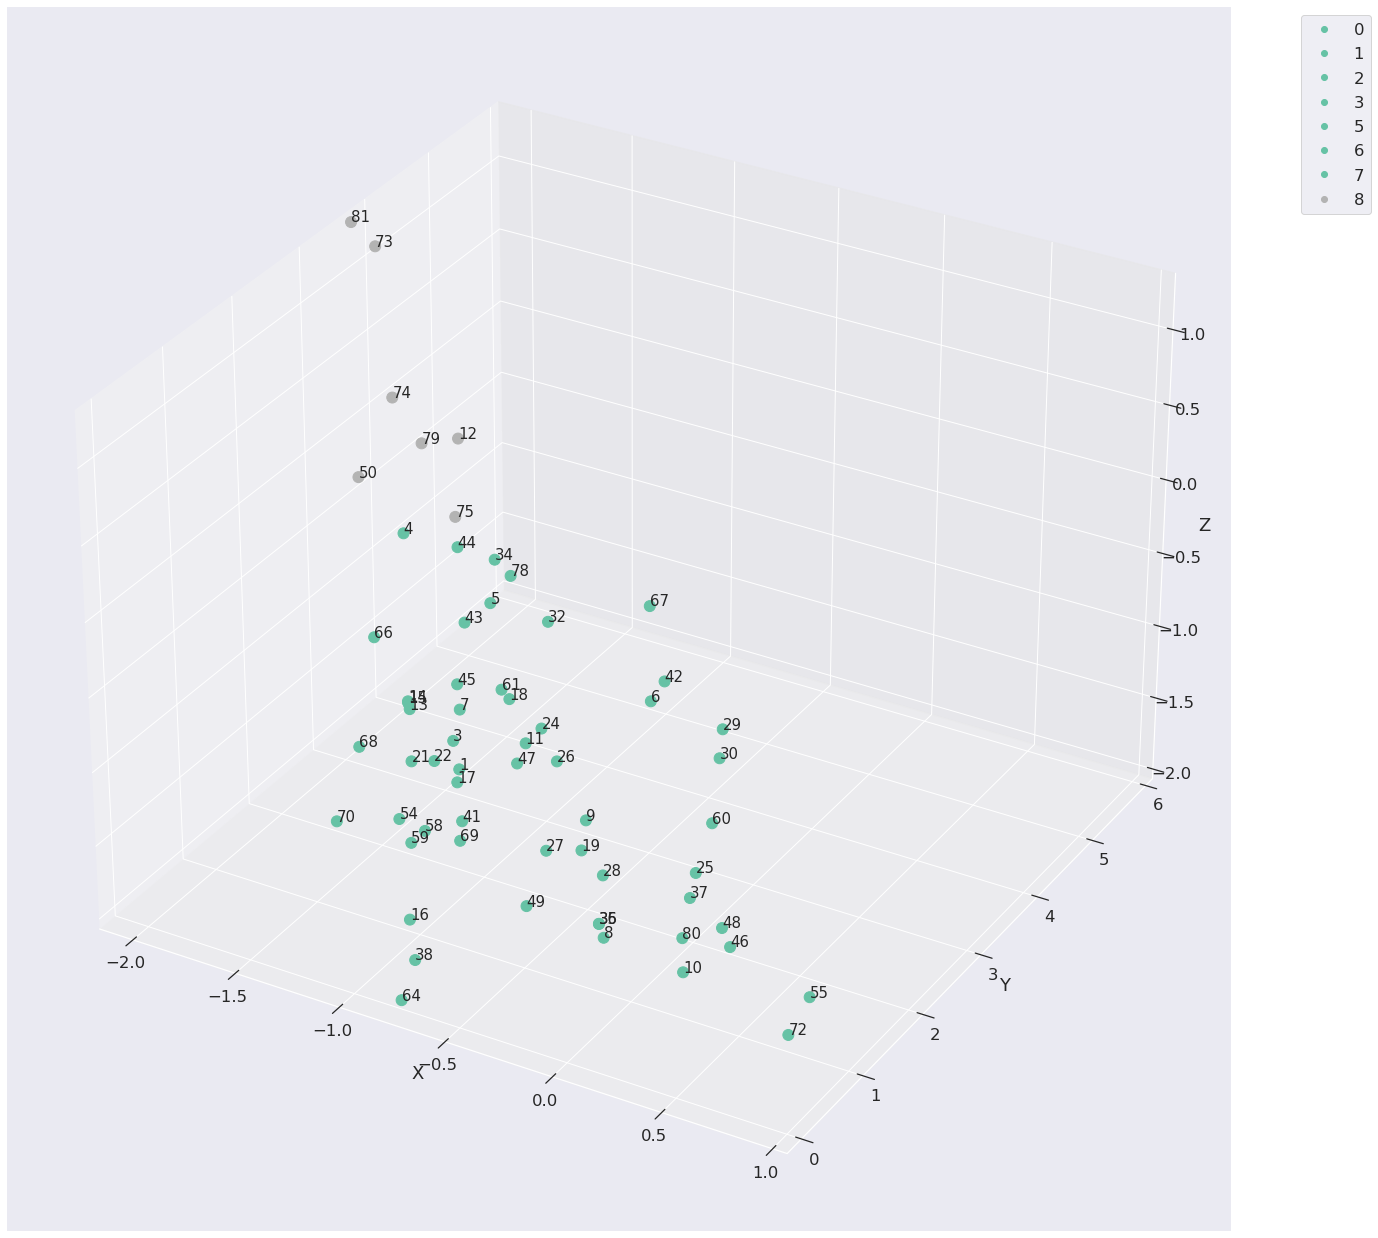

In [ ]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

labels = Y.cluster
# generate data
x = Y[0].to_numpy()
y = Y[1].to_numpy()
z = Y[2].to_numpy()
zdirs = (None, 'x', 'y', 'z', (1, 1, 0), (1, 1, 1))
#sns.set(font_scale=1.5)
# axes instance
fig = plt.figure(figsize=(17,17))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("Set2", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=120, c=labels, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

for i, index in enumerate(Y.index.tolist()):
    ax.text(x[i], y[i], z[i], str(index), size='small')
ax.set_xlim(-2.1, 1)
ax.set_ylim(-0.1, 6)
ax.set_zlim(-2, 1.3)

# save
plt.savefig("scatter_zoom", bbox_inches='tight')


In [ ]:
eo['cluster'] = labels

In [ ]:
eo

,index,author,year,critiria,min_age,max_age,men,women,proportional,gender,country_1,country_2,cluster
0,1,alder,2022,crr,2,8,24,8,no,no,usa,usa,NaN
1,3,arnell,2022,crr,12,16,8,4,no,no,suecia,suecia,0.0
2,4,arnell,2020,c+isr+crr,6,12,16,12,no,no,suecia,suecia,NaN
3,5,arnell,2018,crr,12,16,17,7,no,si,suecia,suecia,3.0
4,6,bassette,2018,crr,18,21,1,2,no,no,usa,usa,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,76,waldron,2022,crr,18,78,3451,919,no,si,usa,usa,NaN
63,78,woodman,2018,crr,5,13,11,2,no,no,usa,usa,NaN
64,79,ye,2019,crr,11,14,20,4,no,no,china,china,2.0
65,80,yu,2020,crr,20,29,35,0,no,no,korea,korea,NaN


In [ ]:
labels

index
1     0
3     3
4     3
5     3
6     1
     ..
75    8
78    0
79    8
80    1
81    8
Name: cluster, Length: 63, dtype: int32

In [ ]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import prince

In [ ]:
CLUSTERS = pd.read_csv('EO_cluster_final.csv')
data = CLUSTERS[CLUSTERS.country_1!=CLUSTERS.country_2]

In [ ]:
data['country_1'] = data.country_2.copy()

/tmp/ipykernel_6729/1703227103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country_1'] = data.country_2.copy()


In [ ]:
data = pd.concat([CLUSTERS, data], sort=False)

In [ ]:
data = data.rename(columns={'country_1':'country'})

In [ ]:
data.reset_index(inplace=True)

In [ ]:
sns.set_style("whitegrid" )
colors = sns.color_palette('Set1', n_colors=9)
palette = {mode: color for mode, color in zip(eo.cluster.unique(), colors)}
sns.histplot(data, y="country", hue="cluster", element="bars", palette=palette)
sns.set(font_scale=1.0)
plt.savefig("country_x_cluster.png") 

ValueError: The palette dictionary is missing keys: {4}

# 